In [143]:
import sys
import os
import PIL
import numpy as np
from numpy.linalg import norm
from math import *
from scipy import ndimage
from scipy import misc
import skimage

from sympy import *

%matplotlib inline 
import matplotlib.pyplot as plt


In [34]:
def estimateModelAttempt1():
    r,g = symbols('r g')
    a0,r0,g0 = symbols('a0 r0 g0')
    a1,r1,g1 = symbols('a1 r1 g1')
    
    print solveset(Eq(r0, a0*r + (1-a0)*255), r)
    
    # r as a function of a0, r0
    # Eq(r, rFromA0R0)
    rFromA0R0 = (255*a0 + r0 - 255)/a0
    
    print Eq(r1, a1*r + (1-a1)*255).subs(r, rFromA0R0)
    # r1 as a function of a0, r0, a1
    # Eq(r1, r1FromA0R0A1)
    r1FromA0R0A1 = -255*a1 + 255 + a1*(255*a0 + r0 - 255)/a0
    
    # Similarly, g1 as a function of a0, g0, a1
    # Eq(g1, g1FromA0R0A1)
    g1FromA0G0A1 = -255*a1 + 255 + a1*(255*a0 + g0 - 255)/a0
    
    print solveset(Eq(r1, r1FromA0R0A1), a1)
    a1FromA0R0R1 = a0*(r1 - 255)/(r0 - 255)
    
    g1FromA0G0R0R1 = simplify(g1FromA0G0A1.subs(a1, a1FromA0R0R1))
    print g1FromA0G0R0R1
    # a0 disappears!
    g1FromA0G0R0R1 = (g0*r1 - 255*g0 + 255*r0 - 255*r1)/(r0 - 255)
    
    print '==='
    
estimateModelAttempt1()


 {(255*a0 + r0 - 255)/a0}
Eq(r1, -255*a1 + 255 + a1*(255*a0 + r0 - 255)/a0)
{a0*(r1 - 255)/(r0 - 255)}
(g0*r1 - 255*g0 + 255*r0 - 255*r1)/(r0 - 255)
===


In [36]:
def testModel1():
    r0,g0,b0 = (157.,212.,244.)
    r1,g1,b1 = (218.,239.,251.)
    print 'g1FromR = ', (g0*r1 - 255*g0 + 255*r0 - 255*r1)/(r0 - 255)
    print 'g1FromB = ', (g0*b1 - 255*g0 + 255*b0 - 255*b1)/(b0 - 255)
    print 'b1FromR = ', (b0*r1 - 255*b0 + 255*r0 - 255*r1)/(r0 - 255)
    print 'b1FromG = ', (b0*g1 - 255*b0 + 255*g0 - 255*g1)/(g0 - 255)
    print 'r1FromG = ', (r0*g1 - 255*r0 + 255*g0 - 255*g1)/(g0 - 255)
    print 'r1FromB = ', (r0*b1 - 255*r0 + 255*b0 - 255*b1)/(b0 - 255)    
    
testModel1()

g1FromR =  238.765306122
g1FromB =  239.363636364
b1FromR =  250.846938776
b1FromG =  250.906976744
r1FromG =  218.534883721
r1FromB =  219.363636364


In [33]:
def testModel1_2():
    r0,g0,b0 = (127.,255.,255.)
    r1,g1,b1 = (255.,255.,255.)
    print 'g1FromR = ', (g0*r1 - 255*g0 + 255*r0 - 255*r1)/(r0 - 255)
    print 'b1FromR = ', (b0*r1 - 255*b0 + 255*r0 - 255*r1)/(r0 - 255)
    print 'b1FromG = ', (b0*g1 - 255*b0 + 255*g0 - 255*g1)/(g0 - 255)
    print 'r1FromG = ', (r0*g1 - 255*r0 + 255*g0 - 255*g1)/(g0 - 255)
    
testModel1_2()

g1FromR =  255.0
b1FromR =  255.0
b1FromG = 

ZeroDivisionError: float division by zero

In [81]:
def estimateSimplerModel():
    r,g = symbols('r g')
    a0,r0,g0 = symbols('a0 r0 g0')
    a1,r1,g1 = symbols('a1 r1 g1')
    
    r0def = a0*r + (1-a0)*255
    g0def = a0*g + (1-a0)*255

    # Does not depend on a0, getting (r - 255)/(g - 255)
    print simplify((r0def-255)/(g0def-255))
    
    # Conclusion 1: (r0-255)/(g0-255) = (r1-255)/(g1-255) if they come from the same color
    # If the background was black, we'd get r0/g0 = r1/g1
    
    # Conclusion 2: we can't recover the true color and alpha values if the background
    # is grayscale.    
    
estimateSimplerModel()


(r - 255)/(g - 255)


In [83]:
def testSimpleModel():
    r0,g0,b0 = (157.,212.,244.)
    r1,g1,b1 = (218.,239.,251.)
    
    # Should be the same
    print (r0-255.)/(g0-255.)
    print (r1-255.)/(g1-255.)
    
    # Should be the same
    print (r0-255.)/(b0-255.)
    print (r1-255.)/(b1-255.)
    
testSimpleModel()

2.27906976744
2.3125
8.90909090909
9.25


In [9]:
def testColor0():
    ref = np.array([81.,179.,235.])
    v0 = np.array([157.,212.,244.])
    v1 = np.array([218.,239.,251.])
    v2 = np.array([110.,191.,238.])
    
    alphas0 = (v0 - 255) / (ref - 255)
    alphas1 = (v1 - 255) / (ref - 255)
    alphas2 = (v2 - 255) / (ref - 255)
    print 'alphas0', alphas0
    print 'alphas1', alphas1
    print 'alphas2', alphas2
    
    
testColor0()


alphas0 [ 0.56321839  0.56578947  0.55      ]
alphas1 [ 0.21264368  0.21052632  0.2       ]
alphas2 [ 0.83333333  0.84210526  0.85      ]


In [45]:
def linearToSrgb(L):
    if L <= 0.0031308:
        return L * 12.92 * 255.0
    else: 
        return 255.0 * ((1.055 * L**0.41667) - 0.055)
linearToSrgb = np.vectorize(linearToSrgb)

def sRgbToLinearRgb(S):
    S = S/255.0
    if (S <= 0.04045):
        return S/12.92
    else: 
        return ((S+0.055)/1.055)**2.4
sRgbToLinearRgb = np.vectorize(sRgbToLinearRgb)

def testSrgbToLinear():
    srgb0 = np.array([157.,212.,244.])
    linear0 = sRgbToLinearRgb(srgb0)
    srgba1 = linearToSrgb(linear0)
    
testSrgbToLinear()

def testWithGamma1():
    ref = np.array([241.,230.,42.])
    v0 = np.array([243.,232.,66.])
    v1 = np.array([245.,239.,127.])
    
    ref = v0
    
    #ref = sRgbToLinearRgb(ref)
    #v0 = sRgbToLinearRgb(v0)
    #v1 = sRgbToLinearRgb(v1)
    
    alphas0 = (v0 - 255) / (ref - 255)
    alphas1 = (v1 - 255) / (ref - 255)
    print 'alphas0', alphas0
    print 'alphas1', alphas1
    
    r,g,b = ref
    r0,g0,b0 = v0
    r1,g1,b1 = v1
    print 'g1FromR = ', (g*r1 - 255*g + 255*r - 255*r1)/(r - 255)
    print 'g1FromB = ', (g*b1 - 255*g + 255*b - 255*b1)/(b - 255)
    print 'b1FromR = ', (b*r1 - 255*b + 255*r - 255*r1)/(r - 255)
    print 'b1FromG = ', (b*g1 - 255*b + 255*g - 255*g1)/(g - 255)
    print 'r1FromG = ', (r*g1 - 255*r + 255*g - 255*g1)/(g - 255)
    print 'r1FromB = ', (r*b1 - 255*r + 255*b - 255*b1)/(b - 255)    
    
testWithGamma1()


alphas0 [ 1.  1.  1.]
alphas1 [ 0.83333333  0.69565217  0.67724868]
g1FromR =  235.833333333
g1FromB =  239.423280423
b1FromR =  97.5
b1FromG =  123.52173913
r1FromG =  246.652173913
r1FromB =  246.873015873


In [41]:
def testWithGamma2():
    ref = np.array([81.,179.,235.])
    v0 = np.array([126.,198.,241.])
    v1 = np.array([84.,180.,235.])
    
    ref = sRgbToLinearRgb(ref)
    v0 = sRgbToLinearRgb(v0)
    v1 = sRgbToLinearRgb(v1)
    
    alphas0 = (v0 - 255) / (ref - 255)
    alphas1 = (v1 - 255) / (ref - 255)
    print 'alphas0', alphas0
    print 'alphas1', alphas1
    
    r,g,b = ref
    r0,g0,b0 = v0
    r1,g1,b1 = v1
    print 'g1FromR = ', (g*r1 - 255*g + 255*r - 255*r1)/(r - 255)
    print 'g1FromB = ', (g*b1 - 255*g + 255*b - 255*b1)/(b - 255)
    print 'b1FromR = ', (b*r1 - 255*b + 255*r - 255*r1)/(r - 255)
    print 'b1FromG = ', (b*g1 - 255*b + 255*g - 255*g1)/(g - 255)
    print 'r1FromG = ', (r*g1 - 255*r + 255*g - 255*g1)/(g - 255)
    print 'r1FromB = ', (r*b1 - 255*r + 255*b - 255*b1)/(b - 255)    
    
testWithGamma2()


alphas0 [ 0.99950433  0.99955244  0.9998078 ]
alphas1 [ 0.999975   0.9999779  1.       ]
g1FromR =  0.457149449509
g1FromB =  0.450785782838
b1FromR =  0.837124043939
b1FromG =  0.836386719912
r1FromG =  0.0879160909596
r1FromB =  0.0822827071298


(1561857, 3)


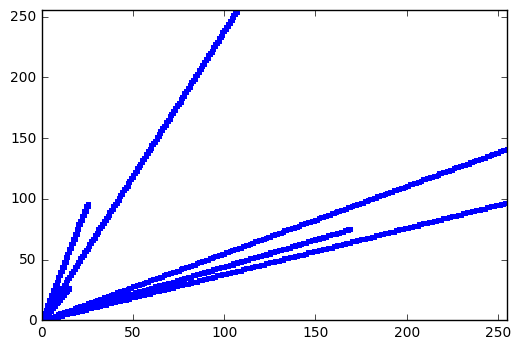

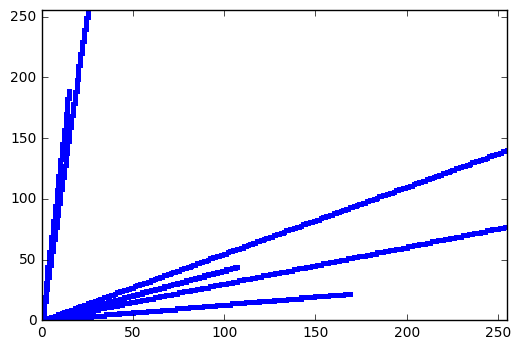

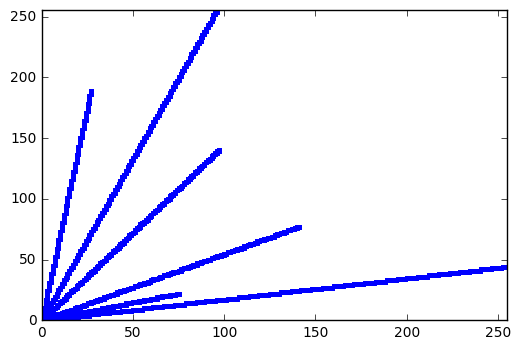

In [144]:
def testPlotImage():
    # image = ndimage.io.imread('../DaltonLensTests/gnuplotLt5CairoCropped.png')
    # image = ndimage.io.imread('../DaltonLensTests/gnuplotLt5Cropped.png')
    # image = ndimage.io.imread('../DaltonLensTests/gnuplotLt5ScreenCaptureCropped.png')
    # image = ndimage.io.imread('../DaltonLensTests/ComplexPlotCropped2.png')
    image = ndimage.io.imread('../DaltonLensTests/RandomPlotsCropped.png')
    # image = ndimage.io.imread('../DaltonLensTests/XcodeBackground.png')
    float_image = skimage.util.dtype.img_as_float(image[:,:,0:3])
    npix = float_image.shape[0]*float_image.shape[1]
    float_image = float_image.reshape((npix,3))
    print float_image.shape
    plt.plot (255.0 - float_image[:,0]*255., 255.0 - float_image[:,1]*255., '.')
    plt.axis([0, 255, 0, 255])    
    plt.figure()
    
    plt.plot (255.0 - float_image[:,0]*255., 255.0 - float_image[:,2]*255., '.')
    plt.axis([0, 255, 0, 255])    
    plt.figure()
    
    plt.plot (255.0 - float_image[:,1]*255., 255.0 - float_image[:,2]*255., '.')
    plt.axis([0, 255, 0, 255])    
    plt.figure()
    
    # Algorithm IDEA:
    # compute points (R-255, G-255), (R-255, B-255), (G-255, B-255)
    # see if they are in the same line as the reference points (fit a line, distance to line < k)
    # count the number of discriminant points (max 3). Values very close to 255 for every channel
    # are not informative. Informative if min(R,G), min(R,B) or min(G,B) < e.g. 100
    # if compatible and informative, mark as definitely a match
    # if compatible and one neighbor is a match, accept it too
    
    # (b0*r1 - 255*b0 + 255*r0 - 255*r1)/(r0 - 255)
    # ratios = (float_image[:,0]*255. - 255.0001)/(float_image[:,2]*255. - 255.0001)
    # plt.plot (np.arange(0, npix, 1), ratios, '.')
    # plt.figure()
    
testPlotImage()


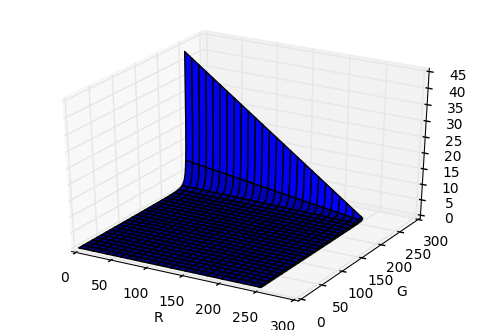

In [215]:
from mpl_toolkits.mplot3d import Axes3D
def plotUncertainty():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
            
    R = np.arange(0.0, 254.0, 1.0)
    G = np.arange(0.0, 254.0, 1.0)
    
    R, G = np.meshgrid(R, G)
    gamma = ((256.0-R)/(255.0-G)) - ((255.0-R)/(256.0-G))
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.plot_surface(R, G, gamma, color='b')
    
plotUncertainty()

(64009,)
[0.003937007874015748 0.003968191973003797 0.003999748047367095 ..., 0.125
 0.2222222222222222 0.5]
[0.007858576501466707 0.007905138339920903 0.007952192734801411 ..., 0.35
 0.5 0.8333333333333334]


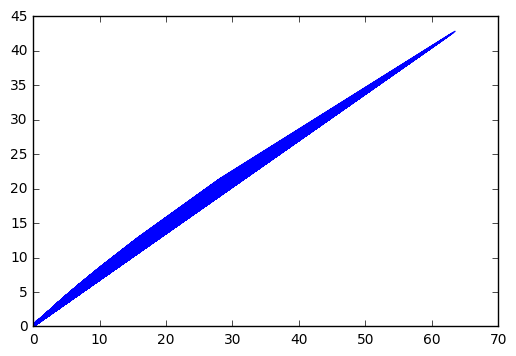

In [199]:
def gammaOf(R,G):
    return ((256.0-R)/(255.0-G)) - ((255.0-R)/(256.0-G))
gammaOf_ufunc = np.frompyfunc(gammaOf, 2, 1)

def distFromOrigin(R,G):
    return (255.0-R)/(255.0-G)**2

def plotUncertaintyFromRatio():
    R = np.arange(1.0, 254.0, 1.0)
    G = np.arange(1.0, 254.0, 1.0)
        
    gamma = gammaOf_ufunc.outer(R,G).flatten()
    print np.shape(gamma)
    
    rOverGValues = np.frompyfunc(distFromOrigin, 2, 1).outer(R,G).flatten()
    print rOverGValues
    print gamma
    
    plt.axis('auto')
    plt.plot(rOverGValues.flatten(), gamma.flatten())
    plt.figure()
    
plotUncertaintyFromRatio()